In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Read-in train and test datasets
Insurance_Data = pd.read_csv('carInsurance_train.csv')
Insurance_test = pd.read_csv('carInsurance_test.csv')

In [3]:
# Looking at shape of train data 
Insurance_Data.shape

(4000, 19)

In [4]:
# Looking at shape of test data 
Insurance_test.shape

(1000, 19)

In [5]:
# Looking at the first five rows
Insurance_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [6]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [7]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe(include='all')

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
count,4000.000000,4000.000000,3981,4000,3831,4000.000000,4000.000000,4000.00000,4000.000000,3098,4000.000000,4000,4000.000000,4000.000000,4000.000000,958,4000,4000,4000.000000
unique,NaN,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,3777,3764,NaN
top,NaN,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,10:42:44,11:27:46,NaN
freq,NaN,NaN,893,2304,1988,NaN,NaN,NaN,NaN,2831,NaN,1049,NaN,NaN,NaN,437,3,3,NaN
mean,2000.500000,41.214750,NaN,NaN,NaN,0.014500,1532.937250,0.49275,0.133000,NaN,15.721250,NaN,2.607250,48.706500,0.717500,NaN,NaN,NaN,0.401000
std,1154.844867,11.550194,NaN,NaN,NaN,0.119555,3511.452489,0.50001,0.339617,NaN,8.425307,NaN,3.064204,106.685385,2.078647,NaN,NaN,NaN,0.490162
min,1.000000,18.000000,NaN,NaN,NaN,0.000000,-3058.000000,0.00000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,1000.750000,32.000000,NaN,NaN,NaN,0.000000,111.000000,0.00000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2000.500000,39.000000,NaN,NaN,NaN,0.000000,551.500000,0.00000,0.000000,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
75%,3000.250000,49.000000,NaN,NaN,NaN,0.000000,1619.000000,1.00000,0.000000,NaN,22.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN,NaN,1.000000


C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


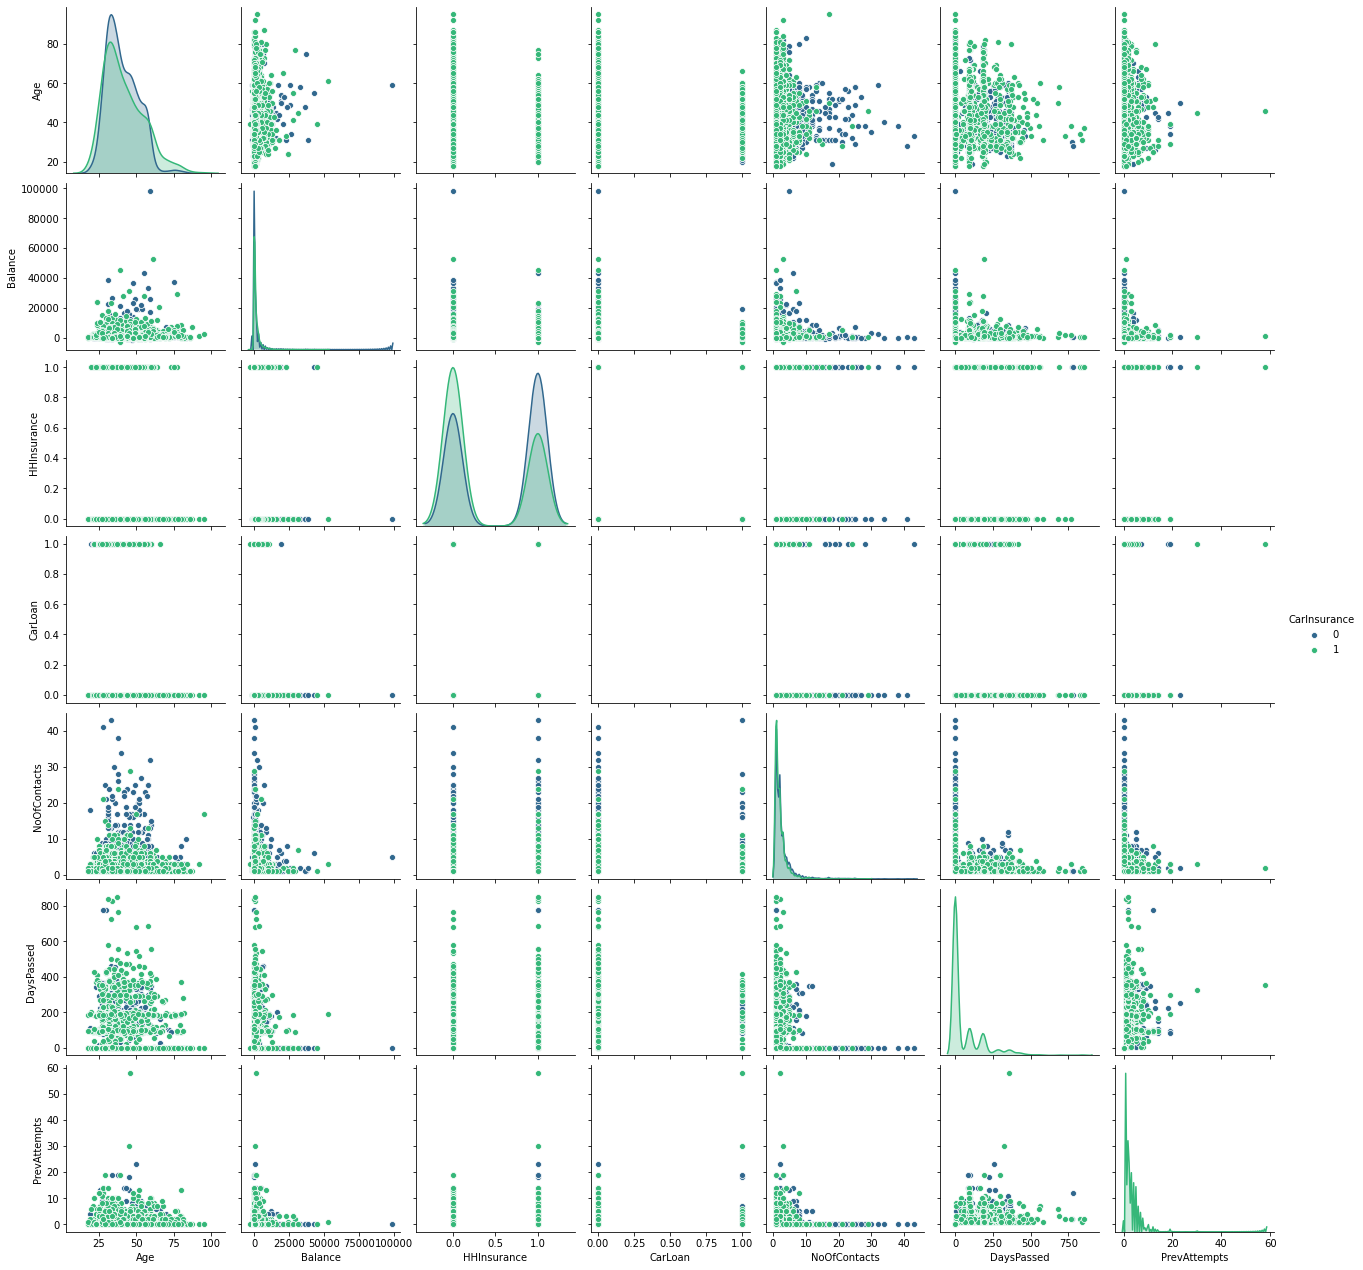

In [8]:
# Visualise the relationship between the features and the response using scatterplots
# Next, pair plot some important features
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(Insurance_Data[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

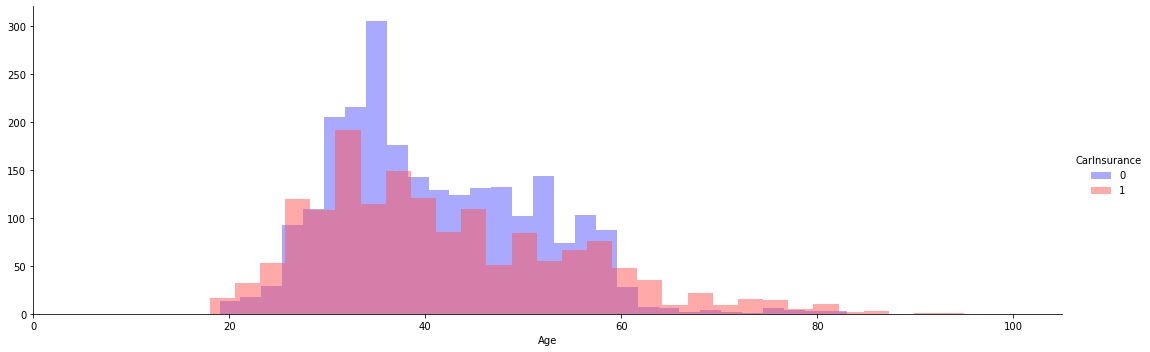

In [10]:
# Take a further look at Age
facet = sns.FacetGrid(Insurance_Data, hue='CarInsurance',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5)
facet.set(xlim=(0,Insurance_Data.Age.max()+10))
facet.add_legend()

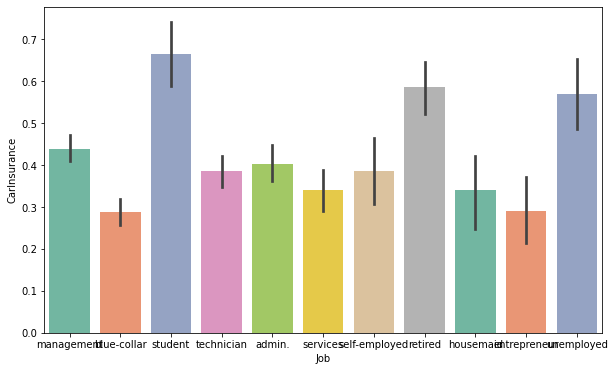

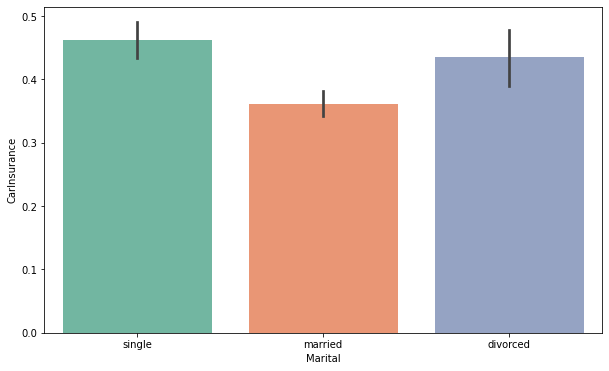

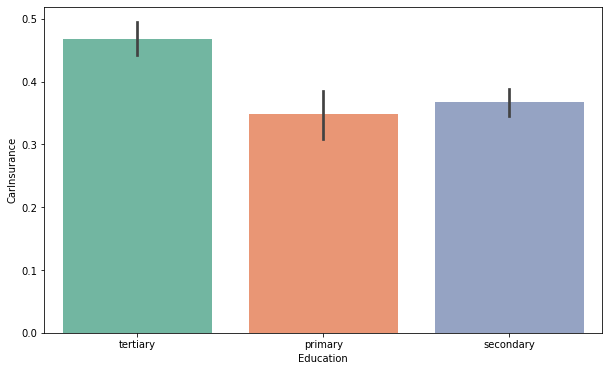

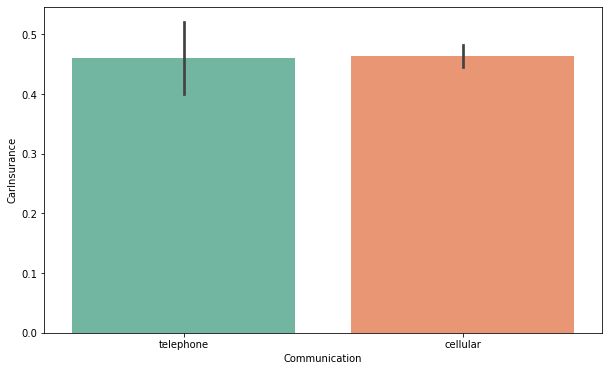

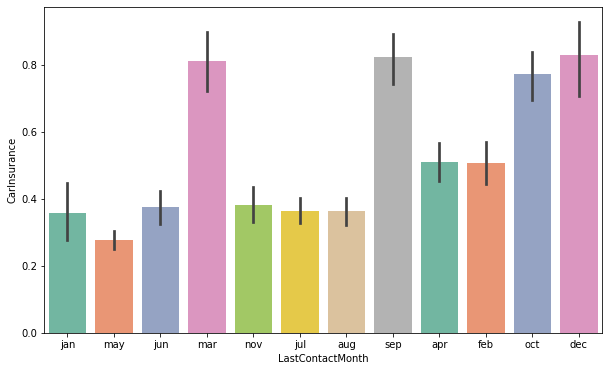

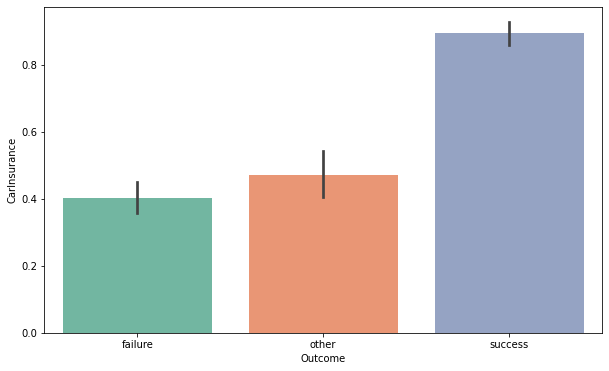

In [11]:
# Next check out categorical features
categorical_col = Insurance_Data.select_dtypes(include=['object']).columns
# We will not plot the CallStart and CallEnd so removing them
categorical_col_plot = categorical_col[(categorical_col!= 'CallStart') & (categorical_col!='CallEnd')]

# This loop will help us to print all the graphs in one go..
for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance', data=Insurance_Data,palette='Set2')

In [12]:
# From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.
Insurance_Data[Insurance_Data['Balance']>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [13]:
#Removing above row
Insurance_Data = Insurance_Data.drop(Insurance_Data[Insurance_Data.index==1742].index)

In [14]:
Insurance_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   int64  
 6   Balance           1000 non-null   int64  
 7   HHInsurance       1000 non-null   int64  
 8   CarLoan           1000 non-null   int64  
 9   Communication     779 non-null    object 
 10  LastContactDay    1000 non-null   int64  
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   int64  
 13  DaysPassed        1000 non-null   int64  
 14  PrevAttempts      1000 non-null   int64  
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [15]:
Insurance_Data.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)
Insurance_test.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)

In [16]:
Insurance_Data['Job'].fillna('management',inplace=True)
Insurance_Data['Education'].fillna('secondary',inplace=True)
Insurance_Data['Communication'].fillna('cellular',inplace=True)
Insurance_Data['Outcome'].fillna('failure',inplace=True)

In [17]:
Insurance_Data.describe(include='all')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
count,3999.000000,3999,3999,3999,3999.000000,3999.000000,3999.000000,3999.000000,3999,3999.000000,3999,3999.000000,3999.000000,3999.000000,3999,3999.000000
unique,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,NaN
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,NaN
freq,NaN,911,2303,2157,NaN,NaN,NaN,NaN,3733,NaN,1049,NaN,NaN,NaN,3478,NaN
mean,41.210303,NaN,NaN,NaN,0.014504,1508.710178,0.492873,0.133033,NaN,15.720180,NaN,2.606652,48.718930,0.717679,NaN,0.401100
std,11.548213,NaN,NaN,NaN,0.119569,3159.903685,0.500012,0.339653,NaN,8.426089,NaN,3.064353,106.695829,2.078876,NaN,0.490183
min,18.000000,NaN,NaN,NaN,0.000000,-3058.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,0.000000,111.000000,0.000000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,0.000000,551.000000,0.000000,0.000000,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,0.000000
75%,49.000000,NaN,NaN,NaN,0.000000,1617.000000,1.000000,0.000000,NaN,22.000000,NaN,3.000000,-1.000000,0.000000,NaN,1.000000


In [18]:
Insurance_test['Job'].fillna('management',inplace=True)
Insurance_test['Education'].fillna('secondary',inplace=True)
Insurance_test['Communication'].fillna('cellular',inplace=True)
Insurance_test['Outcome'].fillna('failure',inplace=True)

In [19]:
Insurance_test.describe(include='all')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000,0.0
unique,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,NaN
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,NaN
freq,NaN,226,594,548,NaN,NaN,NaN,NaN,919,NaN,269,NaN,NaN,NaN,868,NaN
mean,41.473000,NaN,NaN,NaN,0.013000,1398.298000,0.513000,0.12100,NaN,15.546000,NaN,2.50800,51.653000,0.806000,NaN,NaN
std,12.051577,NaN,NaN,NaN,0.113331,2660.408024,0.500081,0.32629,NaN,8.370541,NaN,2.57732,109.024855,2.034331,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,-1980.000000,0.000000,0.00000,NaN,1.000000,NaN,1.00000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,114.750000,0.000000,0.00000,NaN,8.000000,NaN,1.00000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,0.000000,517.500000,1.000000,0.00000,NaN,15.000000,NaN,2.00000,-1.000000,0.000000,NaN,NaN
75%,49.250000,NaN,NaN,NaN,0.000000,1609.750000,1.000000,0.00000,NaN,21.000000,NaN,3.00000,-1.000000,0.000000,NaN,NaN


In [20]:
cat_cols = Insurance_Data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [21]:
cat_data = Insurance_Data[cat_cols]

In [22]:
cat_data_dummies = pd.get_dummies(cat_data)

In [23]:
cat_data_dummies.shape

(3999, 34)

In [24]:
cat_data_dummies.describe()

,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.114779,0.189797,0.030258,0.027257,0.227807,0.062266,0.035009,0.082521,0.032758,0.165041,...,0.143286,0.113528,0.019755,0.262316,0.086522,0.029507,0.025256,0.869717,0.048762,0.081520
std,0.318795,0.392190,0.171317,0.162851,0.419470,0.241667,0.183825,0.275191,0.178025,0.371264,...,0.350408,0.317277,0.139174,0.439948,0.281168,0.169245,0.156922,0.336656,0.215397,0.273667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
numeric_cols = Insurance_Data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'CarInsurance']

In [26]:
num_data = Insurance_Data[numeric_cols]

In [27]:
Insurance_Data_dummy = pd.concat([num_data, cat_data_dummies], axis=1)

In [28]:
Insurance_Data_dummy.shape

(3999, 44)

In [29]:
cat_test = Insurance_test[cat_cols]
cat_test_dummies = pd.get_dummies(cat_test)
print(cat_test_dummies.shape)
num_test = Insurance_test[numeric_cols]
Insurance_test_dummy = pd.concat([num_test, cat_test_dummies], axis=1)
print(Insurance_test_dummy.shape)

(1000, 34)
(1000, 44)


In [30]:
y = Insurance_Data_dummy['CarInsurance']
Insurance_Data_dummy.drop('CarInsurance',axis=1,inplace=True)
Insurance_test_dummy.drop('CarInsurance',axis=1,inplace=True)
print(y.shape)
print(Insurance_Data_dummy.shape)
print(Insurance_test_dummy.shape)

(3999,)
(3999, 43)
(1000, 43)


In [31]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
# Train test split
# The change than of linear is that we have label seprate here
X_train, X_test, y_train, y_test = train_test_split(Insurance_Data_dummy, y, train_size=0.7 , random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2799, 43)
(1200, 43)
(2799,)
(1200,)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()

In [34]:
# fit the model to the training data
lr.fit(X_train,y_train)
# model train complete coefficients calculated

C:\Users\Neha Tewatia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
# Making predictions using the model
y_pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred) only find this no need to find rest above accuracy to recall .

In [37]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is :',precision)
print('Recall is :',recall)
print('Roc Auc is :',roc_auc)

Accuracy is  : 0.6758333333333333
F1 score is : 0.4721845318860244
Precision is : 0.6590909090909091
Recall is : 0.3678646934460888
Roc Auc is : 0.6220341348936083
